In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats
from scipy.stats import spearmanr,pearsonr,chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# put the dataset which comes from long_dataset_feature_engineering.ipynb 
file_path = '/data/caysar9/results/final_long.csv'
# Load migraine data
print("Loading data...")
df = pd.read_csv(file_path)
df.head()

Loading data...


,hashed_uid,hashed_mid,age,gender,country,creationtime_local,starttime_local,endtime_local,pain_intensity,attack_type,...,gender_encoded,sleep_group,sleep_duration_past_7_days,sleep_duration_past_month,sleep_duration_past_semester,sleep_duration_past_year,migraine_attacks_past7days,mean_migraine_duration_past7days,next_migraine_in_window,severe_migraine
0,000d951de579a4875fe199df62ff0d4fd3940b70edf585...,e490e673fe2d2709f168d85b1cf9ddc07ff5b32c96d9ad...,47.0,F,United States,2019-12-13 15:29:08.179,2019-12-13 15:29:00,2019-12-13 23:59:00,10.0,migraine,...,1,Adequate Sleep,8.514527,8.514527,8.514527,8.514527,1.0,8.500000,0,0
1,000d951de579a4875fe199df62ff0d4fd3940b70edf585...,ca16c5dbfa2bd205c6249f126b560f869fb9ea9ee94346...,48.0,F,United States,2020-01-13 09:22:51.654,2020-01-13 07:55:00,2020-01-13 23:59:00,10.0,migraine,...,1,Adequate Sleep,9.270758,9.270758,9.270758,9.270758,2.0,12.283333,0,0
2,000d951de579a4875fe199df62ff0d4fd3940b70edf585...,ee186da8f3e3f1923f30e7eac30d7b26d5e5530a9dcd34...,48.0,F,United States,2020-02-01 08:11:47.821,2020-02-01 07:08:00,2020-02-01 23:59:00,10.0,migraine,...,1,Adequate Sleep,9.030543,9.030543,9.030543,9.030543,3.0,13.805556,0,0
3,000d951de579a4875fe199df62ff0d4fd3940b70edf585...,8d800b15ee8394607d96dfd38c94ca5c6591276dc6709b...,48.0,F,United States,2020-02-24 10:12:11.444,2020-02-24 08:00:00,2020-02-24 23:59:00,10.0,migraine,...,1,Adequate Sleep,9.135507,9.135507,9.135507,9.135507,4.0,14.350000,0,0
4,000d951de579a4875fe199df62ff0d4fd3940b70edf585...,03fbe091054b86710bbbb8f16a883275783bce1af2e536...,48.0,F,United States,2020-04-09 17:01:24.271,2020-04-09 07:01:00,2020-04-09 21:09:00,10.0,migraine,...,1,Adequate Sleep,9.175292,9.175292,9.175292,9.175292,5.0,14.306667,0,0


In [3]:
# ANOVA for Migraine Duration by Age 
model_duration = ols('attack_duration_hours ~ C(age_group)', data=df).fit()
anova_duration = sm.stats.anova_lm(model_duration, typ=2)
print("ANOVA for Migraine Duration by Age:")
print(anova_duration)

# ANOVA for Pain Intensity by Age 
model_pain_intensity = ols('pain_intensity ~ C(age_group)', data=df).fit()
anova_pain_intensity = sm.stats.anova_lm(model_pain_intensity, typ=2)
print("\nANOVA for Pain Intensity by Age:")
print(anova_pain_intensity)

# ANOVA for Migraine days Per Month by Age 
model_migraine_per_month = ols('migraine_days_per_month ~ C(age_group)', data=df).fit()
anova_migraine_per_month = sm.stats.anova_lm(model_migraine_per_month, typ=2)
print("\nANOVA for Migraine days Per Month by Age:")
print(anova_migraine_per_month)


ANOVA for Migraine Duration by Age:
                    sum_sq       df         F        PR(>F)
C(age_group)  2.606775e+04      4.0  32.95036  1.727068e-27
Residual      1.122187e+07  56739.0       NaN           NaN

ANOVA for Pain Intensity by Age:
                     sum_sq       df          F        PR(>F)
C(age_group)     285.662113      4.0  19.777837  2.758135e-16
Residual      204878.097862  56739.0        NaN           NaN

ANOVA for Migraine days Per Month by Age:
                     sum_sq       df           F         PR(>F)
C(age_group)    4868.361214      4.0  303.930943  3.738678e-259
Residual      227211.109249  56739.0         NaN            NaN


In [4]:
# ANOVA for Migraine Duration by Gender 
model_duration = ols('attack_duration_hours ~ C(gender_encoded)', data=df).fit()
anova_duration = sm.stats.anova_lm(model_duration, typ=2)
print("ANOVA for Migraine Duration by Gender:")
print(anova_duration)

# ANOVA for Pain Intensity by Gender 
model_pain_intensity = ols('pain_intensity ~ C(gender_encoded)', data=df).fit()
anova_pain_intensity = sm.stats.anova_lm(model_pain_intensity, typ=2)
print("\nANOVA for Pain Intensity by Gender:")
print(anova_pain_intensity)

# ANOVA for Migraine days Per Month by Gender 
model_migraine_per_month = ols('migraine_days_per_month ~ C(gender_encoded)', data=df).fit()
anova_migraine_per_month = sm.stats.anova_lm(model_migraine_per_month, typ=2)
print("\nANOVA for Migraine days Per Month by Gender:")
print(anova_migraine_per_month)


ANOVA for Migraine Duration by Gender:
                         sum_sq       df           F        PR(>F)
C(gender_encoded)  6.309955e+04      2.0  160.327295  3.679174e-70
Residual           1.122296e+07  57032.0         NaN           NaN

ANOVA for Pain Intensity by Gender:
                          sum_sq       df          F        PR(>F)
C(gender_encoded)    1003.227980      2.0  139.11568  5.366898e-61
Residual           205642.161587  57032.0        NaN           NaN

ANOVA for Migraine days Per Month by Gender:
                          sum_sq       df           F        PR(>F)
C(gender_encoded)    1554.569104      2.0  190.840398  2.484122e-83
Residual           232288.828529  57032.0         NaN           NaN


In [5]:
# ANOVA for Migraine Duration by sleep_group
model_duration = ols('attack_duration_hours ~ C(sleep_group)', data=df).fit()
anova_duration = sm.stats.anova_lm(model_duration, typ=2)
print("ANOVA for Migraine Duration by sleep_group:")
print(anova_duration)

# ANOVA for Pain Intensity by sleep_group
model_pain_intensity = ols('pain_intensity ~ C(sleep_group)', data=df).fit()
anova_pain_intensity = sm.stats.anova_lm(model_pain_intensity, typ=2)
print("\nANOVA for Pain Intensity by sleep_group:")
print(anova_pain_intensity)

# ANOVA for Migraine days Per Month by sleep_group
model_migraine_per_month = ols('migraine_days_per_month ~ C(sleep_group)', data=df).fit()
anova_migraine_per_month = sm.stats.anova_lm(model_migraine_per_month, typ=2)
print("\nANOVA for Migraine days Per Month by sleep_group:")
print(anova_migraine_per_month)


ANOVA for Migraine Duration by sleep_group:
                      sum_sq       df          F        PR(>F)
C(sleep_group)  2.019050e+04      2.0  51.105897  6.681220e-23
Residual        1.126587e+07  57032.0        NaN           NaN

ANOVA for Pain Intensity by sleep_group:
                       sum_sq       df           F        PR(>F)
C(sleep_group)    1275.586632      2.0  177.117706  2.073282e-77
Residual        205369.802936  57032.0         NaN           NaN

ANOVA for Migraine days Per Month by sleep_group:
                       sum_sq       df          F        PR(>F)
C(sleep_group)     150.879141      2.0  18.410814  1.015933e-08
Residual        233692.518492  57032.0        NaN           NaN


In [6]:
# Make independant groups for P.A. trigger
# Associate each user with the trigger and calculate the mean of the trigger column
grouped = df.groupby('hashed_uid')['trigger_physical_activity'].mean().reset_index()

# If the mean is closer to 1, the person mostly had the trigger; closer to 0, mostly no trigger
grouped['dominant_PA_trigger'] = (grouped['trigger_physical_activity'] > 0.5).astype(int)

df = pd.merge(df, grouped[['hashed_uid', 'dominant_PA_trigger']], on='hashed_uid', how='left')

In [7]:
# Make independant groups for lack of P.A. trigger
# Associate each user with the trigger and calculate the mean of the trigger column
grouped = df.groupby('hashed_uid')['trigger_lack_physical_activity'].mean().reset_index()

# If the mean is closer to 1, the person mostly had the trigger; closer to 0, mostly no trigger
grouped['dominant_lack_PA_trigger'] = (grouped['trigger_lack_physical_activity'] > 0.5).astype(int)

df = pd.merge(df, grouped[['hashed_uid', 'dominant_lack_PA_trigger']], on='hashed_uid', how='left')


In [8]:
# Make independant groups for poor sleep trigger
# Associate each user with the trigger and calculate the mean of the trigger column
grouped = df.groupby('hashed_uid')['trigger_poor_sleep'].mean().reset_index()

# If the mean is closer to 1, the person mostly had the trigger; closer to 0, mostly no trigger
grouped['dominant_poor_sleep_trigger'] = (grouped['trigger_poor_sleep'] > 0.5).astype(int)

df = pd.merge(df, grouped[['hashed_uid', 'dominant_poor_sleep_trigger']], on='hashed_uid', how='left')


In [9]:
# Make independant groups for lack of sleep trigger
# Associate each user with the trigger and calculate the mean of the trigger column
grouped = df.groupby('hashed_uid')['trigger_lack_sleep'].mean().reset_index()

# If the mean is closer to 1, the person mostly had the trigger; closer to 0, mostly no trigger
grouped['dominant_lack_sleep_trigger'] = (grouped['trigger_lack_sleep'] > 0.5).astype(int)

df = pd.merge(df, grouped[['hashed_uid', 'dominant_lack_sleep_trigger']], on='hashed_uid', how='left')


In [10]:
# Make independant groups for stress trigger
# Associate each user with the trigger and calculate the mean of the trigger column
grouped = df.groupby('hashed_uid')['trigger_stress'].mean().reset_index()

# If the mean is closer to 1, the person mostly had the trigger; closer to 0, mostly no trigger
grouped['dominant_stress_trigger'] = (grouped['trigger_stress'] > 0.5).astype(int)

df = pd.merge(df, grouped[['hashed_uid', 'dominant_stress_trigger']], on='hashed_uid', how='left')


In [11]:
# Check for overlap in individuals between groups with and without triggers
with_trigger = df[df['dominant_stress_trigger'] == 1]
without_trigger = df[df['dominant_stress_trigger'] == 0]

overlap = pd.merge(with_trigger, without_trigger, on='hashed_uid', how='inner')

# Check if there's any overlap
if overlap.empty:
    print("The groups are independent (no overlap).")
else:
    print("The groups are dependent (there is overlap).")


The groups are independent (no overlap).


In [12]:
# List of dependent variables
dependent_vars = ['attack_duration_hours', 'pain_intensity', 'migraine_days_per_month']

# Function to perform one-tailed t-tests and show means, std, t-statistic, and p-value
def ttest_with_summary(group_1, group_2, var_name, group_1_name, group_2_name, alternative):
    mean_group_1 = group_1.mean()
    mean_group_2 = group_2.mean()
    std_group_1 = group_1.std()
    std_group_2 = group_2.std()

    # Perform one-tailed t-test for inequality 
    t_stat, p_value = stats.ttest_ind(group_1, group_2, nan_policy='omit', alternative=alternative)

    print(f"\nT-test for {var_name} between {group_1_name} and {group_2_name}:")
    print(f"Mean for {group_1_name}: {mean_group_1:.3f}, Std: {std_group_1:.3f}")
    print(f"Mean for {group_2_name}: {mean_group_2:.3f}, Std: {std_group_2:.3f}")
    print(f"T-statistic: {t_stat:.3f}, P-value (one-tailed): {p_value:.3f}")

# Perform one-tailed t-tests

# T-test for Physical Activity Trigger 
for var in dependent_vars:
    group_with_trigger = df[df['dominant_PA_trigger'] == 1][var]
    group_without_trigger = df[df['dominant_PA_trigger'] == 0][var]
    ttest_with_summary(group_with_trigger, group_without_trigger, var, "With Physical Activity Trigger", "Without Physical Activity Trigger", alternative='greater')

# T-test for Lack of Physical Activity Trigger 
for var in dependent_vars:
    group_with_trigger = df[df['dominant_lack_PA_trigger'] == 1][var]
    group_without_trigger = df[df['dominant_lack_PA_trigger'] == 0][var]
    ttest_with_summary(group_with_trigger, group_without_trigger, var, "With Lack of Physical Activity Trigger", "Without Lack of Physical Activity Trigger", alternative='greater')

# T-test for Stress Trigger 
for var in dependent_vars:
    group_with_trigger = df[df['dominant_stress_trigger'] == 1][var]
    group_without_trigger = df[df['dominant_stress_trigger'] == 0][var]
    ttest_with_summary(group_with_trigger, group_without_trigger, var, "With Stress Trigger", "Without Stress Trigger", alternative='greater')

# T-test for Poor Quality Sleep Trigger 
for var in dependent_vars:
    group_with_trigger = df[df['dominant_poor_sleep_trigger'] == 1][var]
    group_without_trigger = df[df['dominant_poor_sleep_trigger'] == 0][var]
    ttest_with_summary(group_with_trigger, group_without_trigger, var, "With Poor Sleep Trigger", "Without Poor Sleep Trigger", alternative='greater')

# T-test for Lack of Sleep Trigger 
for var in dependent_vars:
    group_with_trigger = df[df['dominant_lack_sleep_trigger'] == 1][var]
    group_without_trigger = df[df['dominant_lack_sleep_trigger'] == 0][var]
    ttest_with_summary(group_with_trigger, group_without_trigger, var, "With Lack of Sleep Trigger", "Without Lack of Sleep Trigger", alternative='greater')



T-test for attack_duration_hours between With Physical Activity Trigger and Without Physical Activity Trigger:
Mean for With Physical Activity Trigger: 20.674, Std: 15.314
Mean for Without Physical Activity Trigger: 17.320, Std: 14.045
T-statistic: 6.440, P-value (one-tailed): 0.000

T-test for pain_intensity between With Physical Activity Trigger and Without Physical Activity Trigger:
Mean for With Physical Activity Trigger: 6.460, Std: 1.776
Mean for Without Physical Activity Trigger: 5.794, Std: 1.904
T-statistic: 9.457, P-value (one-tailed): 0.000

T-test for migraine_days_per_month between With Physical Activity Trigger and Without Physical Activity Trigger:
Mean for With Physical Activity Trigger: 2.291, Std: 1.556
Mean for Without Physical Activity Trigger: 3.029, Std: 2.029
T-statistic: -9.847, P-value (one-tailed): 1.000

T-test for attack_duration_hours between With Lack of Physical Activity Trigger and Without Lack of Physical Activity Trigger:
Mean for With Lack of Physica

In [13]:
# Generate the contingency table between multiple triggers
contingency_table = pd.crosstab([df['trigger_poor_sleep'], df['trigger_lack_sleep']],
                                [df['trigger_lack_physical_activity'], df['trigger_physical_activity'], df['trigger_stress']])


styled_table = contingency_table.style.format("{:,.0f}") \
                                       .background_gradient(cmap='Blues') \
                                       .set_table_styles([
                                           {'selector': 'thead th', 
                                            'props': [('background-color', '#f2f2f2'), 
                                                      ('color', 'black'), 
                                                      ('border', '1px solid black')]}]) \
                                       .set_properties(**{'border': '1px solid black', 'width': '60px'}) \
                                       .set_caption("Contingency Table for Multiple Triggers")


styled_table


In [14]:
# Chi-Square test between 'trigger_poor_sleep' and 'trigger_lack_sleep'
contingency_sleep = pd.crosstab(df['trigger_poor_sleep'], df['trigger_lack_sleep'])

# Perform Chi-Square test
chi2_sleep, p_sleep, dof_sleep, expected_sleep = chi2_contingency(contingency_sleep)

# Print results for 'trigger_poor_sleep' vs 'trigger_lack_sleep'
print(f"Chi-Square Test Results for Poor Sleep vs Lack of Sleep:")
print(f"Chi-Square statistic: {chi2_sleep:.3f}, P-value: {p_sleep:.3f}\n")

# Chi-Square test between 'trigger_stress' and 'trigger_poor_sleep'
contingency_stress_sleep = pd.crosstab(df['trigger_stress'], df['trigger_poor_sleep'])

# Perform Chi-Square test
chi2_stress_sleep, p_stress_sleep, dof_stress_sleep, expected_stress_sleep = chi2_contingency(contingency_stress_sleep)

# Print results for 'trigger_stress' vs 'trigger_poor_sleep'
print(f"Chi-Square Test Results for Stress vs Poor Sleep:")
print(f"Chi-Square statistic: {chi2_stress_sleep:.3f}, P-value: {p_stress_sleep:.3f}\n")

# Chi-Square test between 'trigger_stress' and 'trigger_lack_sleep'
contingency_stress_lacksleep = pd.crosstab(df['trigger_stress'], df['trigger_lack_sleep'])

# Perform Chi-Square test
chi2_stress_lacksleep, p_stress_lacksleep, dof_stress_lacksleep, expected_stress_lacksleep = chi2_contingency(contingency_stress_lacksleep)

# Print results for 'trigger_stress' vs 'trigger_lack_sleep'
print(f"Chi-Square Test Results for Stress vs Lack Sleep:")
print(f"Chi-Square statistic: {chi2_stress_lacksleep:.3f}, P-value: {p_stress_lacksleep:.3f}\n")


# Chi-Square test between 'trigger_stress' and 'trigger_lack_physical_activity'
contingency_stress_lack_act = pd.crosstab(df['trigger_stress'], df['trigger_lack_physical_activity'])

# Perform Chi-Square test
chi2_stress_lack_act, p_stress_lack_act, dof_stress_lack_act, expected_stress_lack_act = chi2_contingency(contingency_stress_lack_act)

# Print results for 'trigger_stress' vs 'trigger_lack_physical_activity'
print(f"Chi-Square Test Results for Stress vs Lack physical activity:")
print(f"Chi-Square statistic: {chi2_stress_lack_act:.3f}, P-value: {p_stress_lack_act:.3f}\n")


Chi-Square Test Results for Poor Sleep vs Lack of Sleep:
Chi-Square statistic: 30738.016, P-value: 0.000

Chi-Square Test Results for Stress vs Poor Sleep:
Chi-Square statistic: 3528.636, P-value: 0.000

Chi-Square Test Results for Stress vs Lack Sleep:
Chi-Square statistic: 2946.600, P-value: 0.000

Chi-Square Test Results for Stress vs Lack physical activity:
Chi-Square statistic: 962.428, P-value: 0.000



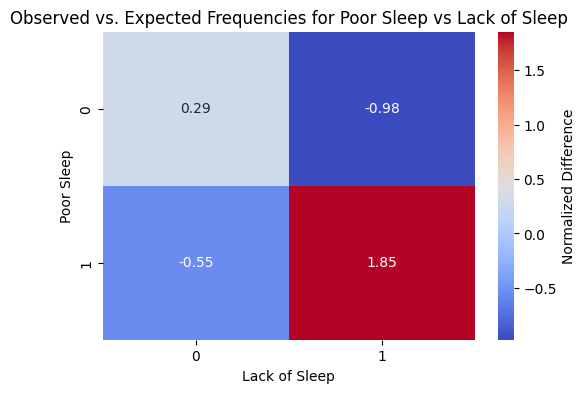

In [15]:
# for 'trigger_poor_sleep' vs 'trigger_lack_sleep'
contingency_sleep = pd.crosstab(df['trigger_poor_sleep'], df['trigger_lack_sleep'])

# Perform Chi-Square test
chi2_sleep, p_sleep, dof_sleep, expected_sleep = chi2_contingency(contingency_sleep)

# Convert observed and expected frequencies for comparison
observed_sleep = contingency_sleep.values
expected_sleep = np.array(expected_sleep)

# Calculate the difference between observed and expected frequencies
difference_sleep = observed_sleep - expected_sleep

# Normalize the difference
normalized_difference_sleep = difference_sleep / expected_sleep

difference_df = pd.DataFrame(normalized_difference_sleep, 
                             index=contingency_sleep.index, 
                             columns=contingency_sleep.columns)

# Visualize the differences as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(difference_df, annot=True, cmap="coolwarm", fmt=".2f", cbar_kws={'label': 'Normalized Difference'})
plt.title("Observed vs. Expected Frequencies for Poor Sleep vs Lack of Sleep")
plt.xlabel("Lack of Sleep")
plt.ylabel("Poor Sleep")
plt.show()


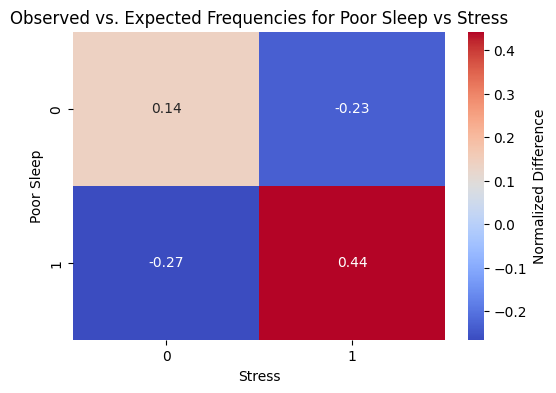

In [16]:
# for 'trigger_poor_sleep' vs 'trigger_stress'
contingency_sleep = pd.crosstab(df['trigger_poor_sleep'], df['trigger_stress'])

# Perform Chi-Square test
chi2_sleep, p_sleep, dof_sleep, expected_sleep = chi2_contingency(contingency_sleep)

# Convert observed and expected frequencies for comparison
observed_sleep = contingency_sleep.values
expected_sleep = np.array(expected_sleep)

# Calculate the difference between observed and expected frequencies
difference_sleep = observed_sleep - expected_sleep

# Normalize the difference
normalized_difference_sleep = difference_sleep / expected_sleep

difference_df = pd.DataFrame(normalized_difference_sleep, 
                             index=contingency_sleep.index, 
                             columns=contingency_sleep.columns)

# Visualize the differences as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(difference_df, annot=True, cmap="coolwarm", fmt=".2f", cbar_kws={'label': 'Normalized Difference'})
plt.title("Observed vs. Expected Frequencies for Poor Sleep vs Stress")
plt.xlabel("Stress")
plt.ylabel("Poor Sleep")
plt.show()


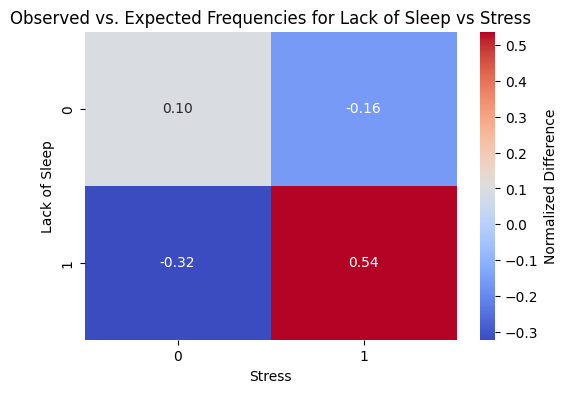

In [17]:
# for 'trigger_lack_sleep' vs 'trigger_stress'
contingency_sleep = pd.crosstab(df['trigger_lack_sleep'], df['trigger_stress'])

# Perform Chi-Square test
chi2_sleep, p_sleep, dof_sleep, expected_sleep = chi2_contingency(contingency_sleep)

# Convert observed and expected frequencies for comparison
observed_sleep = contingency_sleep.values
expected_sleep = np.array(expected_sleep)

# Calculate the difference between observed and expected frequencies
difference_sleep = observed_sleep - expected_sleep

# Normalize the difference
normalized_difference_sleep = difference_sleep / expected_sleep

difference_df = pd.DataFrame(normalized_difference_sleep, 
                             index=contingency_sleep.index, 
                             columns=contingency_sleep.columns)

# Visualize the differences as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(difference_df, annot=True, cmap="coolwarm", fmt=".2f", cbar_kws={'label': 'Normalized Difference'})
plt.title("Observed vs. Expected Frequencies for Lack of Sleep vs Stress")
plt.xlabel("Stress")
plt.ylabel("Lack of Sleep")
plt.show()


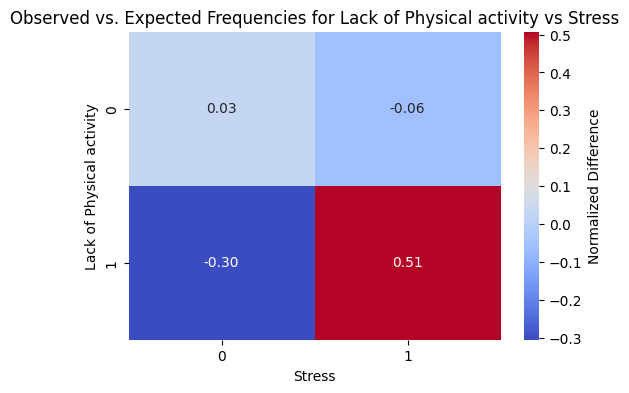

In [18]:
# for 'trigger_lack_of_physical_activity' vs 'trigger_stress'
contingency_sleep = pd.crosstab(df['trigger_lack_physical_activity'], df['trigger_stress'])

# Perform Chi-Square test
chi2_sleep, p_sleep, dof_sleep, expected_sleep = chi2_contingency(contingency_sleep)

# Convert observed and expected frequencies  for comparison
observed_sleep = contingency_sleep.values
expected_sleep = np.array(expected_sleep)

# Calculate the difference between observed and expected frequencies
difference_sleep = observed_sleep - expected_sleep

# Normalize the difference
normalized_difference_sleep = difference_sleep / expected_sleep

difference_df = pd.DataFrame(normalized_difference_sleep, 
                             index=contingency_sleep.index, 
                             columns=contingency_sleep.columns)

# Visualize the differences as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(difference_df, annot=True, cmap="coolwarm", fmt=".2f", cbar_kws={'label': 'Normalized Difference'})
plt.title("Observed vs. Expected Frequencies for Lack of Physical activity vs Stress")
plt.xlabel("Stress")
plt.ylabel("Lack of Physical activity")
plt.show()


In [19]:
def print_correlation_and_pvalues(correlation_matrix, pvalue_matrix, significance_level=0.05):
    print("Correlation Coefficients and P-values:")
    for i in range(correlation_matrix.shape[0]):
        for j in range(i+1, correlation_matrix.shape[1]):
            corr = correlation_matrix.iloc[i, j]
            pval = pvalue_matrix.iloc[i, j]
            if pval < significance_level:
                print(f"{correlation_matrix.columns[i]} vs {correlation_matrix.columns[j]}: "
                      f"Correlation = {corr:.3f}, p-value = {pval:.3e}")

# Function to calculate correlation matrix and p-values
def correlation_with_significance(df, method='pearson'):
    df_corr = pd.DataFrame(np.zeros((df.shape[1], df.shape[1])), columns=df.columns, index=df.columns)
    df_pval = pd.DataFrame(np.zeros((df.shape[1], df.shape[1])), columns=df.columns, index=df.columns)

    for i in range(df.shape[1]):
        for j in range(i, df.shape[1]):
            if method == 'pearson':
                corr, pval = pearsonr(df.iloc[:, i], df.iloc[:, j])
            elif method == 'spearman':
                corr, pval = spearmanr(df.iloc[:, i], df.iloc[:, j])
            df_corr.iloc[i, j] = df_corr.iloc[j, i] = corr
            df_pval.iloc[i, j] = df_pval.iloc[j, i] = pval

    return df_corr, df_pval


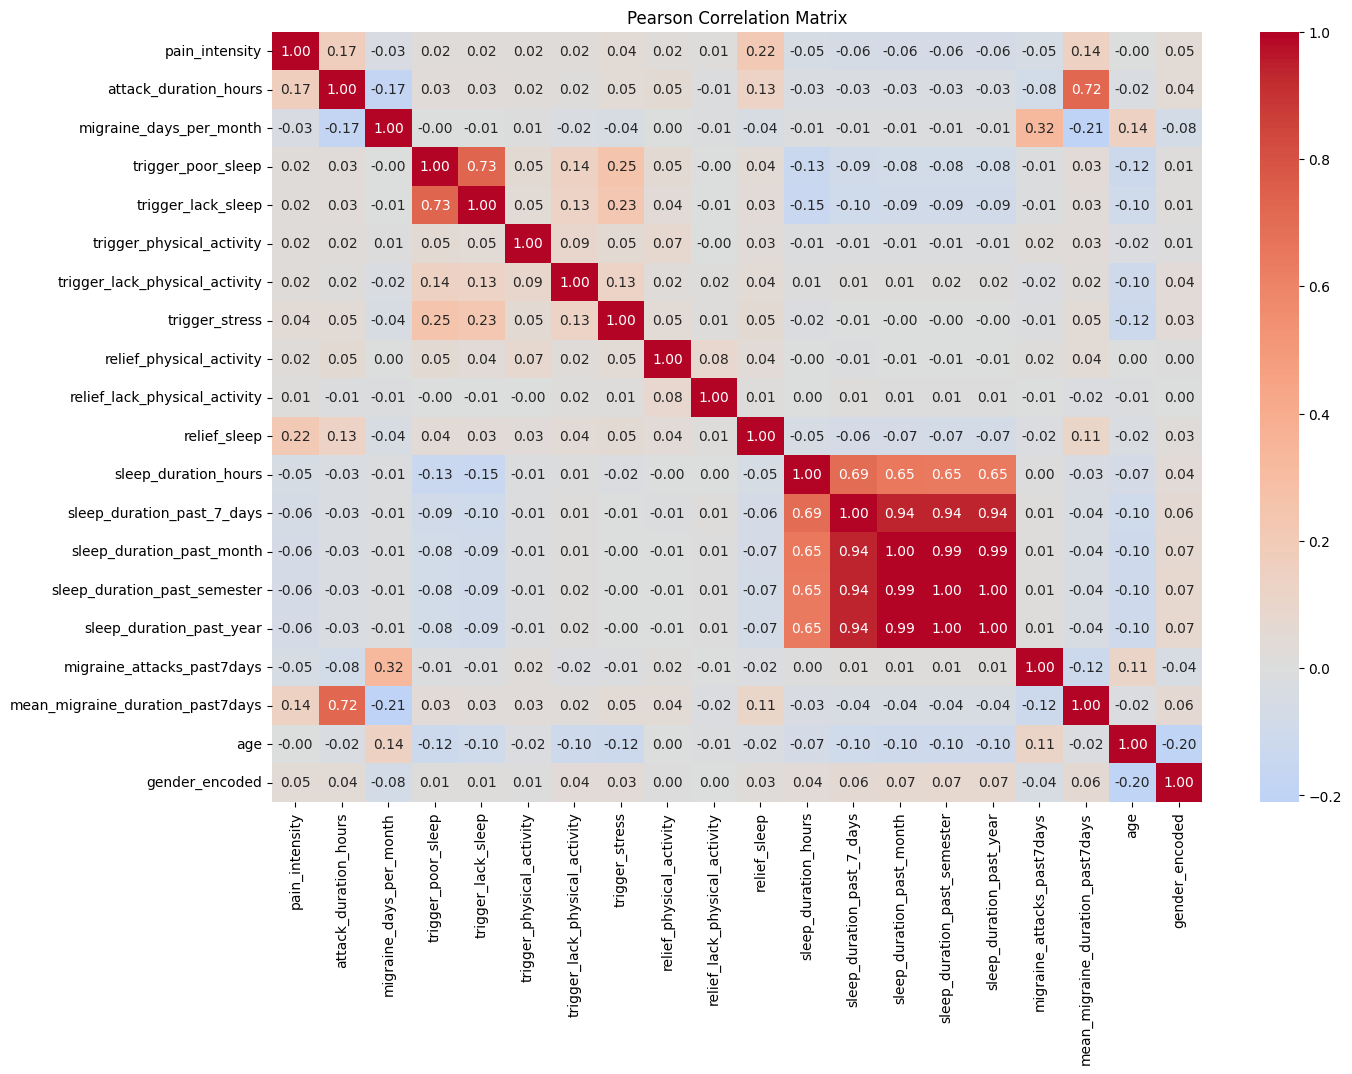

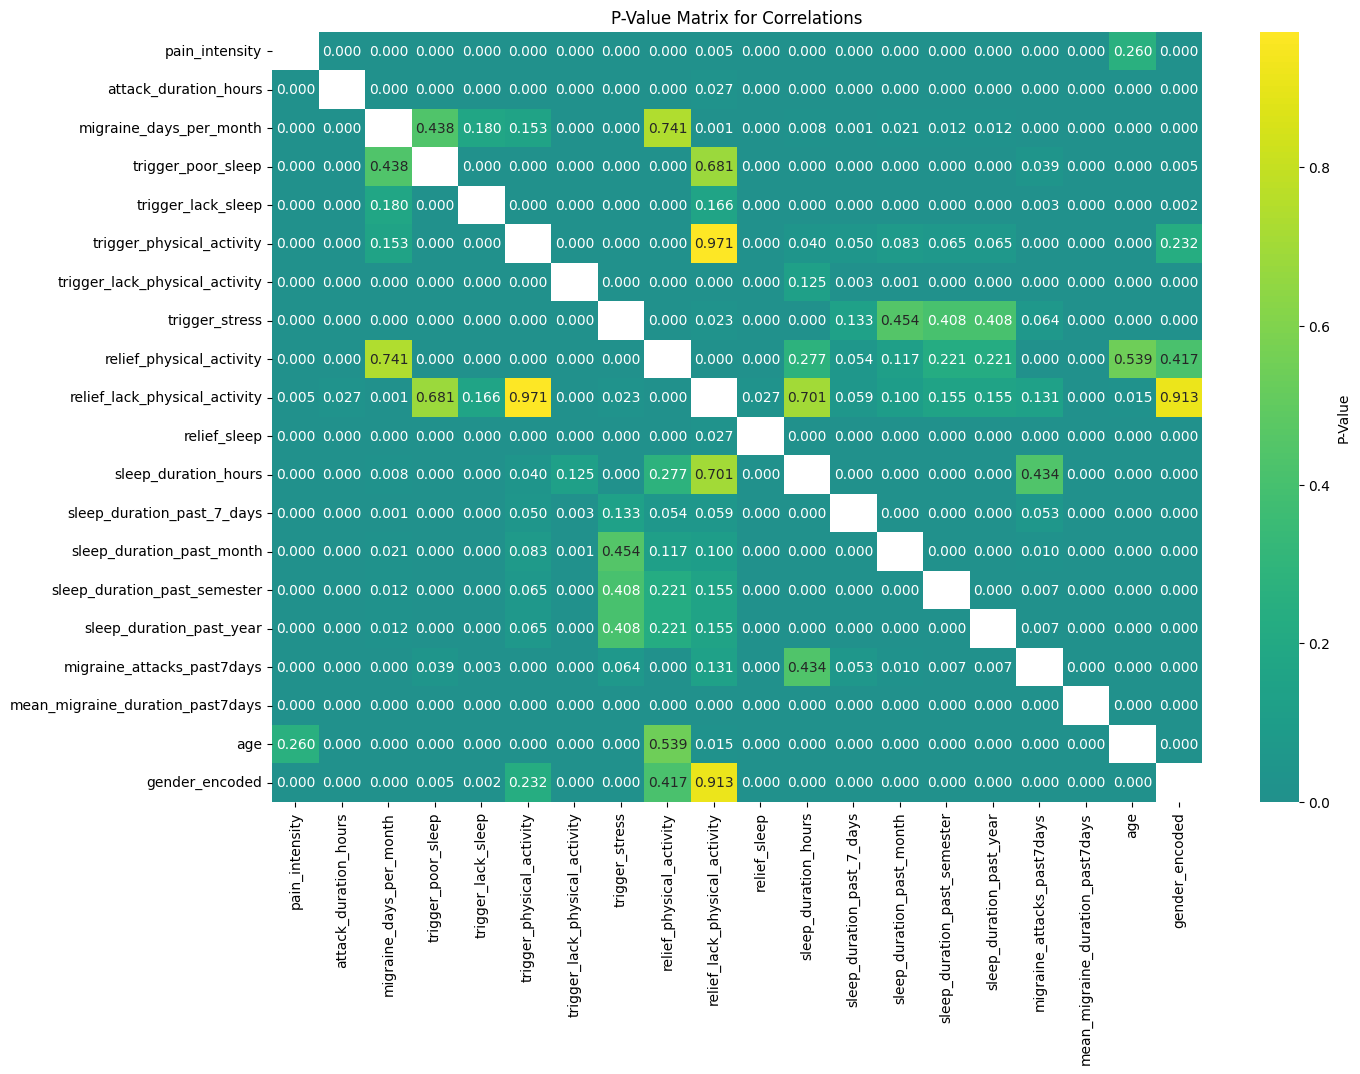

Correlation Coefficients and P-values:
pain_intensity vs attack_duration_hours: Correlation = 0.170, p-value = 0.000e+00
pain_intensity vs migraine_days_per_month: Correlation = -0.032, p-value = 2.980e-14
pain_intensity vs trigger_poor_sleep: Correlation = 0.021, p-value = 5.671e-07
pain_intensity vs trigger_lack_sleep: Correlation = 0.018, p-value = 2.669e-05
pain_intensity vs trigger_physical_activity: Correlation = 0.017, p-value = 4.703e-05
pain_intensity vs trigger_lack_physical_activity: Correlation = 0.020, p-value = 1.233e-06
pain_intensity vs trigger_stress: Correlation = 0.041, p-value = 4.713e-23
pain_intensity vs relief_physical_activity: Correlation = 0.019, p-value = 4.191e-06
pain_intensity vs relief_lack_physical_activity: Correlation = 0.012, p-value = 4.551e-03
pain_intensity vs relief_sleep: Correlation = 0.215, p-value = 0.000e+00
pain_intensity vs sleep_duration_hours: Correlation = -0.051, p-value = 4.987e-34
pain_intensity vs sleep_duration_past_7_days: Correlat

In [24]:
# Subset for correlation analysis
df_subset = df[['pain_intensity', 'attack_duration_hours', 'migraine_days_per_month', 'trigger_poor_sleep',
                          'trigger_lack_sleep', 'trigger_physical_activity', 'trigger_lack_physical_activity', 
                          'trigger_stress', 'relief_physical_activity', 'relief_lack_physical_activity', 
                          'relief_sleep', 'sleep_duration_hours','sleep_duration_past_7_days','sleep_duration_past_month',
                          'sleep_duration_past_semester','sleep_duration_past_year',
                          'migraine_attacks_past7days','mean_migraine_duration_past7days', 'age', 'gender_encoded']]

# Define a function to calculate correlation and p-values
def correlation_with_significance(df, method='pearson'):
    from scipy.stats import pearsonr
    corr_matrix = df.corr(method=method)  # Correlation matrix
    pvalue_matrix = pd.DataFrame(np.zeros_like(corr_matrix), columns=df.columns, index=df.columns)
    
    # Calculate p-values
    for i in corr_matrix.columns:
        for j in corr_matrix.columns:
            if i != j:
                corr, p_value = pearsonr(df[i].dropna(), df[j].dropna())
                pvalue_matrix.loc[i, j] = p_value
            else:
                pvalue_matrix.loc[i, j] = np.nan  # NaN for diagonal (self-correlation)
    return corr_matrix, pvalue_matrix

# Calculate correlation and p-value matrices
correlation_matrix, pvalue_matrix = correlation_with_significance(df_subset, method='pearson')

# Plot the correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title('Pearson Correlation Matrix')
plt.show()

# Plot the p-value matrix
plt.figure(figsize=(15, 10))
sns.heatmap(pvalue_matrix, annot=True, cmap='viridis', center=0, fmt=".3f", cbar_kws={'label': 'P-Value'})
plt.title('P-Value Matrix for Correlations')
plt.show()

print_correlation_and_pvalues(correlation_matrix, pvalue_matrix)


In [21]:
# significant correlations between different sleep groups
def print_significant_correlations(df, significance_level=0.05):
    df_corr = pd.DataFrame(np.zeros((df.shape[1], df.shape[1])), columns=df.columns, index=df.columns)
    df_pval = pd.DataFrame(np.zeros((df.shape[1], df.shape[1])), columns=df.columns, index=df.columns)

    # Calculate correlations and p-values
    significant_pairs = []
    for i in range(df.shape[1]):
        for j in range(i+1, df.shape[1]): 
            corr, pval = pearsonr(df.iloc[:, i], df.iloc[:, j])
            if pval < significance_level:
                significant_pairs.append((df.columns[i], df.columns[j], corr, pval))

    if significant_pairs:
        print(f"Significant correlations (p < {significance_level}):")
        for var1, var2, corr, pval in significant_pairs:
            print(f"{var1} vs {var2}: Correlation = {corr:.3f}, p-value = {pval:.3e}")
    else:
        print(f"No significant correlations (p < {significance_level}) found.")

def analyze_by_group(df, group_column, group_value, variables):
    df_group = df[df[group_column] == group_value]  # Filter by the specific group
    df_group_subset = df_group[variables]  
    
    print(f"\nAnalyzing correlations for {group_column}: {group_value}")
    print_significant_correlations(df_group_subset)

variables_of_interest = ['pain_intensity', 'attack_duration_hours', 'migraine_days_per_month', 'trigger_poor_sleep',
                         'trigger_lack_sleep', 'trigger_physical_activity', 'trigger_lack_physical_activity', 
                         'trigger_stress', 'relief_physical_activity', 'relief_lack_physical_activity', 
                         'relief_sleep']


# For the 'Adequate Sleep' group in 'sleep_group'
analyze_by_group(df, 'sleep_group', 'Adequate Sleep', variables_of_interest)
# For the 'Short Sleep' group in 'sleep_group'
analyze_by_group(df, 'sleep_group', 'Short Sleep', variables_of_interest)
# For the 'excessive Sleep' group in 'sleep_group'
analyze_by_group(df, 'sleep_group', 'Excessive Sleep', variables_of_interest)


Analyzing correlations for sleep_group: Adequate Sleep
Significant correlations (p < 0.05):
pain_intensity vs attack_duration_hours: Correlation = 0.179, p-value = 1.277e-194
pain_intensity vs migraine_days_per_month: Correlation = -0.073, p-value = 1.016e-33
pain_intensity vs trigger_poor_sleep: Correlation = 0.018, p-value = 3.360e-03
pain_intensity vs trigger_lack_sleep: Correlation = 0.016, p-value = 7.333e-03
pain_intensity vs trigger_lack_physical_activity: Correlation = 0.034, p-value = 1.883e-08
pain_intensity vs trigger_stress: Correlation = 0.024, p-value = 1.023e-04
pain_intensity vs relief_physical_activity: Correlation = 0.034, p-value = 1.782e-08
pain_intensity vs relief_lack_physical_activity: Correlation = 0.034, p-value = 3.423e-08
pain_intensity vs relief_sleep: Correlation = 0.220, p-value = 1.953e-293
attack_duration_hours vs migraine_days_per_month: Correlation = -0.162, p-value = 4.135e-159
attack_duration_hours vs trigger_poor_sleep: Correlation = 0.030, p-value